## Latar Belakang

Perusahaan SaaS yang berfokus pada penjualan perangkat lunak penjualan dan pemasaran untuk perusahaan B2B beroperasi di pasar yang sangat kompetitif, dimana pemahaman mendalam tentang perilaku pelanggan dan dinamika pasar sangat penting untuk keberhasilan jangka panjang. Dengan semakin banyaknya data transaksi yang dihasilkan setiap hari, perusahaan memiliki peluang besar untuk menggali wawasan berharga yang dapat meningkatkan strategi bisnis mereka. Analisis terhadap data transaksi yang telah dikumpulkan memungkinkan perusahaan untuk mengidentifikasi tren penjualan, memahami preferensi pelanggan, serta mengevaluasi efektivitas kampanye pemasaran. Selain itu, analisis ini juga dapat mengungkapkan area-area dimana perusahaan dapat meningkatkan efisiensi operasional, seperti penetapan harga yang lebih baik, segmentasi pelanggan yang lebih tepat, dan pengoptimalan proses penjualan. Dengan memanfaatkan data transaksi secara optimal, perusahaan dapat membuat keputusan yang lebih berbasis data, meningkatkan kepuasan pelanggan, serta mendorong pertumbuhan dan profitabilitas bisnis secara berkelanjutan.

## Menentukan Pertanyaan Bisnis

Berikut ini adalah beberapa pertanyaan yang diharapkan dapat dijawab oleh perusahaan berdasarkan data transaksi yang telah dikumpulkan.
1. Untuk mengalokasikan sumber daya dengan tepat, perlu diketahui produk mana saja yang memberikan keuntungan terbesar bagi perusahaan. Identifikasi 5 produk dengan profit margin tertinggi, dimana profit margin adalah persentase laba bersih yang diperoleh perusahaan dari penjualan.
2. Identifikasi 3 produk yang paling sering tidak memberikan profit untuk dijadikan sebagai target analisis dan penyesuaian harga.
3. Identifikasi 3 industri dengan profit tertinggi untuk dijadikan sebagai prioritas pengembangan ke depannya.
4. Identifikasi 5 negara dengan tingkat penjualan tertinggi untuk dijadikan sebagai prioritas ekspansi perusahaan.
5. Identifikasi segmen pelanggan yang memberikan profit tertinggi untuk meningkatkan retensi. 
6. Perlu dikaji apakah pemberian diskon efektif terhadap penjualan. Apakah terdapat korelasi antara pemberian diskon dengan penjualan?
7. Identifikasi independensi antara 5 negara dengan tingkat penjualan tertinggi dan 3 industri dengan profit tertinggi untuk menentukan apakah 3 industri tersebut harus diprioritaskan atau tidak di 5 negara tersebut. 

## Menyiapkan Semua Library yang Dibutuhkan

Untuk memulai mengerjakan proyek, panggil semua library yang dibutuhkan.

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

## Data Wrangling

### Gathering Data

Pada tahap ini, kumpulkan semua data yang dibutuhkan dengan mengimpor file **SaaS-Sales.csv**. Dataset ini berisi informasi terkait data transaksi penjualan yang terdiri dari 19 kolom, yaitu:
1. Row ID: Identifikasi unik untuk setiap transaksi.
2. Order ID: Identifikasi unik untuk setiap pesanan.
3. Order Date: Tanggal saat pesanan dilakukan.
4. Date Key: Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. Contact Name: Nama orang yang melakukan pemesanan.
6. Country: Negara tempat pesanan dilakukan.
7. City: Kota tempat pesanan dilakukan.
8. Region: Wilayah tempat pesanan dilakukan.
9. Subregion: Subregion tempat pesanan dilakukan.
10. Customer: Nama perusahaan yang melakukan pemesanan.
11. Customer ID: Identifikasi unik untuk setiap pelanggan.
12. Industry: Industri tempat pelanggan berada.
13. Segment: Segmen pelanggan (UKM, Strategis, Perusahaan, dll.).
14. Product: Produk yang dipesan.
15. License: Kunci lisensi produk yang dipesan.
16. Penjualan: Jumlah total penjualan untuk transaksi tersebut.
17. Kuantitas: Jumlah total barang dalam transaksi tersebut.
18. Diskon: Diskon yang diterapkan pada transaksi tersebut.
19. Keuntungan: Keuntungan dari transaksi tersebut.

Muat data dari tabel SaaS-Sales dan simpan ke dalam sebuah DataFrame dengan nama sales_df serta tampilkan 5 data pertama dan 5 data terakhir dari DataFrame sales_df. 

In [51]:
sales_df = pd.read_csv("SaaS-Sales.csv")
display(sales_df.head(), sales_df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Menghapus kolom pada sales_df yang tidak dibutuhkan.

In [52]:
sales_df.drop(["Row ID", "Date Key"], axis = 1, inplace = True)
sales_df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### Assessing Data

Tahap ini akan menilai kualitas dari seluruh data yang akan digunakan, dimana penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

#### Menilai data sales_df

Periksa tipe data dari setiap kolom yang terdapat di dalam sales_df.

In [53]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  License       9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.3+ MB


Jika diperhatikan, jumlah data pada setiap kolom dari sales_df telah lengkap, yaitu berjumlah 9.994, atau dengan kata lain **tidak ada missing value** di dalamnya. Akan tetapi, terdapat **kesalahan tipe data untuk kolom Order Date dan Customer ID**, dimana kolom Order Date harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**, demikian juga kolom Customer ID harusnya direpresentasikan sebagai tipe data **object**, bukan **int64**.

Berikutnya juga perlu diperiksa duplikasi data dan ringkasan parameter statistik dari kolom numerik pada sales_df.

In [54]:
print("Jumlah duplikasi:", sales_df.duplicated().sum())
sales_df.describe()

Jumlah duplikasi: 0


,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1049.771963,229.858001,3.789574,0.156203,28.656896
std,29.719388,623.245101,2.225110,0.206452,234.260108
min,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,1076.000000,209.940000,5.000000,0.200000,29.364000
max,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Tidak dijumpai Sales, Quantity, dan Discount yang bernilai negatif. Tidak dijumpai Sales dan Quantity yang bernilai 0 (nol). Nilai Discount masih berada di antara range 0 s.d. 100%. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada sales_df. 

### Cleaning Data

Tahap ini akan membersihkan berbagai masalah yang telah teridentifikasi pada proses assessing data.

#### Ubah tipe data dari kolom Order Date menjadi datetime

In [55]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Jika diperhatikan, kolom **Order Date** telah direpresentasikan sebagai tipe data **datetime**.

#### Ubah tipe data dari kolom Customer ID menjadi object

In [56]:
sales_df["Customer ID"] = sales_df["Customer ID"].astype("object")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Jika diperhatikan, kolom **Customer ID** telah direpresentasikan sebagai tipe data **int64**.

## Exploratory Data Analysis (EDA)

Tahap ini akan melakukan eksplorasi data guna menjawab pertanyaan bisnis. 

#### Menampilkan 5 produk dengan profit margin tertinggi

In [57]:
product_margin_df = sales_df.groupby("Product")[["Profit", "Sales"]].sum()
product_margin_df["Profit Margin"] = round(product_margin_df["Profit"] / product_margin_df["Sales"] * 100, 2)
product_margin_df = product_margin_df.sort_values(by = "Profit Margin", ascending = False).head().reset_index()
product_margin_df

,Product,Profit,Sales,Profit Margin
0,SaaS Connector Pack - Gold,6964.1767,16476.402,42.27
1,Alchemy,55617.8249,149528.030,37.20
2,Storage,949.5182,3024.280,31.40
3,Support,32864.4698,125152.744,26.26
4,Data Smasher,41936.6357,167380.318,25.05


Berdasarkan tabel di atas, dapat disimpulkan bahwa 5 produk dengan profit margin terbesar adalah SaaS Connector Pack - Gold, Alchemy, Storage, Support, dan Data Smasher.

#### Menampilkan 3 produk yang paling sering tidak memberikan profit

In [58]:
product_profit_df = sales_df[sales_df["Profit"] <= 0]
product_profit_df = round(product_profit_df.groupby("Product")[["Profit"]].sum(), 2)
product_profit_df = product_profit_df.sort_values(by = "Profit").head(3).reset_index()
product_profit_df

,Product,Profit
0,ContactMatcher,-70922.64
1,Big Ol Database,-30118.67
2,Marketing Suite,-12152.21


Berdasarkan tabel di atas, dapat disimpulkan bahwa 3 produk yang paling sering tidak memberikan profit adalah ContactMatcher, Big Ol Database, dan Marketing Suite.

#### Menampilkan 3 industri dengan profit tertinggi

In [59]:
industry_profit_df = round(sales_df.groupby("Industry")[["Profit"]].sum(), 2)
industry_profit_df = industry_profit_df.sort_values(by = "Profit", ascending = False).head(3).reset_index()
industry_profit_df

,Industry,Profit
0,Finance,50348.97
1,Energy,45282.31
2,Manufacturing,38413.11


Berdasarkan tabel di atas, dapat disimpulkan bahwa 3 industri dengan profit tertinggi adalah Finance, Energy,  dan Manufacturing.

#### Menampilkan 5 negara dengan tingkat penjualan tertinggi

In [60]:
country_sales_df = round(sales_df.groupby("Country")[["Sales"]].sum(), 2)
country_sales_df = country_sales_df.sort_values(by = "Sales", ascending = False).head().reset_index()
country_sales_df

,Country,Sales
0,United States,457687.63
1,United Kingdom,313169.88
2,Japan,170188.05
3,Canada,138641.27
4,France,116511.91


Berdasarkan tabel di atas, dapat disimpulkan bahwa 5 negara dengan tingkat penjualan tertinggi adalah United States, United Kingdom, Japan, Canada, dan France.

#### Menampilkan segmen pelanggan dengan tingkat profit tertinggi

In [61]:
segment_profit_df = round(sales_df.groupby("Segment")[["Profit"]].sum(), 2)
segment_profit_df = segment_profit_df.sort_values(by = "Profit", ascending = False).head().reset_index()
segment_profit_df

,Segment,Profit
0,SMB,134119.21
1,Strategic,91979.13
2,Enterprise,60298.68


Berdasarkan tabel di atas, dapat disimpulkan bahwa segmen pelanggan dengan tingkat profit tertinggi adalah SMB.

#### Mencari korelasi antara pemberian diskon dengan penjualan

In [62]:
sales_discount_df = sales_df[["Sales", "Discount"]]
sales_discount_df.head()

,Sales,Discount
0,261.9600,0.00
1,731.9400,0.00
2,14.6200,0.00
3,957.5775,0.45
4,22.3680,0.20


##### Memeriksa distribusi data apakah normal atau tidak

Untuk mengetahui apakah data berdistribusi normal atau tidak dapat menggunakan Uji Shaphiro Wilk, dimana:
- H0: Data berdistribusi normal
- H1: Data tidak berdistribusi normal

In [64]:
alpha = 0.05

for column in sales_discount_df.columns:
    pvalue = shapiro(sales_discount_df[column])
    if pvalue[1] > alpha:
        print(f'''
        Hasil Uji Shapiro Wilk untuk {column}:
        pvalue = {pvalue[1]:.5f}, dimana pvalue > {alpha}.
        Gagal untuk menolak H0, sehingga {column} berdistribusi normal.''')
    else:
        print(f'''
        Hasil Uji Shapiro Wilk untuk {column}:
        pvalue = {pvalue[1]:.5f}, dimana pvalue <= {alpha}.
        Menolak H0, sehingga {column} tidak berdistribusi normal.''')


        Hasil Uji Shapiro Wilk untuk Sales:
        pvalue = 0.00000, dimana pvalue <= 0.05.
        Menolak H0, sehingga Sales tidak berdistribusi normal.

        Hasil Uji Shapiro Wilk untuk Discount:
        pvalue = 0.00000, dimana pvalue <= 0.05.
        Menolak H0, sehingga Discount tidak berdistribusi normal.


Karena data tidak berdistribusi normal, maka gunakan korelasi Spearman.

In [65]:
sales_discount_df = round(sales_discount_df.corr(method = "spearman"), 2)
sales_discount_df

,Sales,Discount
Sales,1.00,-0.06
Discount,-0.06,1.00


Karena nilai korelasi di antara range 0 s.d. 0.25, maka dapat disimpulkan bahwa korelasi antara pemberian diskon dengan penjualan sangat rendah.

##### Memeriksa independensi antara 5 negara dengan tingkat penjualan tertinggi dan 3 industri dengan profit tertinggi

Membuat tabel pivot untuk setiap nilai Country dan Industry, dimana Country merupakan 5 negara dengan tingkat penjualan tertinggi dan Industry merupakan 3 industri dengan profit tertinggi 

In [66]:
country_industry_df = sales_df[(sales_df["Country"].isin(country_sales_df["Country"])) & (sales_df["Industry"].isin(industry_profit_df["Industry"]))]
country_industry_df = country_industry_df[["Country", "Industry"]].pivot_table(index = "Country", columns = "Industry", aggfunc = len)
country_industry_df

Industry,Energy,Finance,Manufacturing
Country,,,
Canada,69,129,57
France,45,121,94
Japan,167,207,103
United Kingdom,163,265,137
United States,245,416,226


Menguji independensi antara Country dan Industry dengan menggunakan Uji Chi-Square.
- H0: Country dan Industry tidak terkait/independen (proporsinya sama)
- H1: Country dan Industry terkait/dependen

In [67]:
alpha = 0.05
pvalue = chi2_contingency(country_industry_df)
if pvalue[1] > alpha:
    print(f'''
    Hasil Uji Chi-Square:
    pvalue = {pvalue[1]:.5f}, dimana pvalue > {alpha}.
    Gagal untuk menolak H0, karena kita tidak punya cukup bukti untuk mengatakan bahwa antara Country dan Industry ada keterkaitan (dependen).''')
else:
    print(f'''
    Hasil Uji Chi-Square:
    pvalue = {pvalue[1]:.5f}, dimana pvalue <= {alpha}.
    Menolak H0, karena kita punya cukup bukti untuk mengatakan bahwa antara Country dan Industry ada keterkaitan (dependen).''')


    Hasil Uji Chi-Square:
    pvalue = 0.00001, dimana pvalue <= 0.05.
    Menolak H0, karena kita punya cukup bukti untuk mengatakan bahwa antara Country dan Industry ada keterkaitan (dependen).


## Visualization & Explanatory Analysis

Tahap ini akan membuat visualisasi data serta melakukan explanatory analysis yang berfokus untuk menjawab pertanyaan bisnis yang telah dinyatakan di awal.

### Pertanyaan 1: Untuk mengalokasikan sumber daya dengan tepat, perlu diketahui produk mana saja yang memberikan keuntungan terbesar bagi perusahaan. Identifikasi 10 produk dengan profit margin tertinggi, dimana profit margin adalah persentase laba bersih yang diperoleh perusahaan dari penjualan.

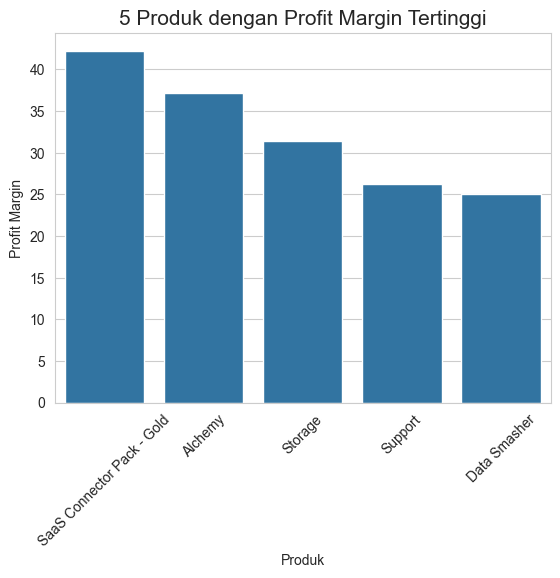

In [68]:
sns.barplot(data = product_margin_df, x = "Product", y = "Profit Margin")
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.xlabel("Produk", fontsize = 10)
plt.ylabel("Profit Margin", fontsize = 10)
plt.title("5 Produk dengan Profit Margin Tertinggi", fontsize = 15)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa 5 produk dengan profit margin terbesar adalah SaaS Connector Pack - Gold, Alchemy, Storage, Support, dan Data Smasher.

### Pertanyaan 2: Identifikasi 3 produk yang paling sering tidak memberikan profit untuk dijadikan sebagai target analisis dan penyesuaian harga.

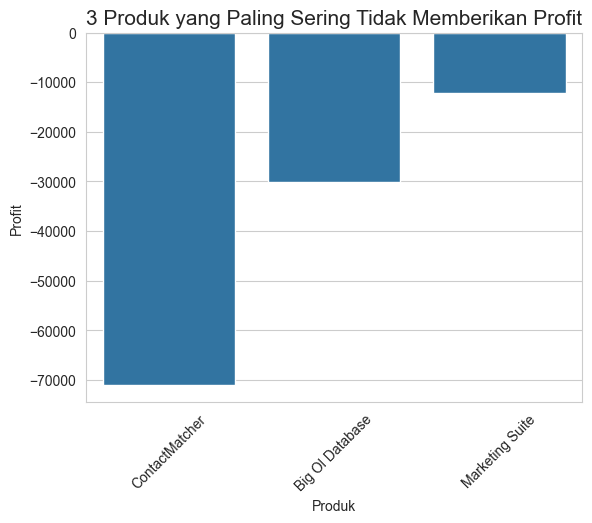

In [69]:
sns.barplot(data = product_profit_df, x = "Product", y = "Profit")
plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)
plt.xlabel("Produk", fontsize = 10)
plt.ylabel("Profit", fontsize = 10)
plt.title("3 Produk yang Paling Sering Tidak Memberikan Profit", fontsize = 15)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa 3 produk yang paling sering tidak memberikan profit adalah ContactMatcher, Big Ol Database, dan Marketing Suite.

### Pertanyaan 3: Identifikasi 3 industri dengan profit tertinggi untuk dijadikan sebagai prioritas pengembangan ke depannya.

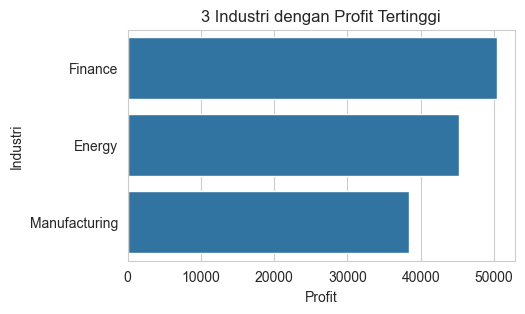

In [70]:
fig, ax = plt.subplots(figsize = (5, 3))
ax = sns.barplot(data = industry_profit_df, x = "Profit", y = "Industry")
ax.set_title("3 Industri dengan Profit Tertinggi")
plt.xlabel("Profit", fontsize = 10)
plt.ylabel("Industri", fontsize = 10)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa 3 industri dengan profit tertinggi adalah Finance, Energy,  dan Manufacturing.

### Pertanyaan 4: Identifikasi 5 negara dengan tingkat penjualan tertinggi untuk dijadikan sebagai prioritas ekspansi perusahaan.

In [71]:
geolocator = Nominatim(user_agent = "geoapi")
latitude = []
longitude = []
for country in country_sales_df["Country"]:
    location = geolocator.geocode(country, exactly_one = True)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

country_sales_df["Latitude"] = latitude
country_sales_df["Longitude"] = longitude

map = folium.Map(location = [29.6166068, 7.8992381], zoom_start = 2)
for i in country_sales_df.index:
    country_marker = folium.Marker(location = [country_sales_df["Latitude"][i], country_sales_df["Longitude"][i]],
                                tooltip = country_sales_df["Country"][i],
                                popup = f"Sales\n{country_sales_df['Sales'][i]}",
                                icon = folium.Icon(icon = "flag"))
    country_marker.add_to(map)

map

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa 5 negara dengan tingkat penjualan tertinggi adalah United States, United Kingdom, Japan, Canada, dan France.

### Pertanyaan 5: Identifikasi segmen pelanggan yang memberikan profit tertinggi untuk meningkatkan retensi. 

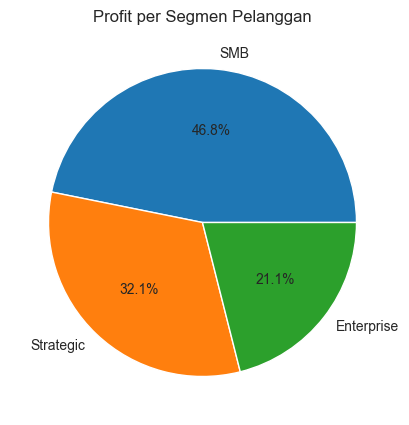

In [72]:
plt.figure(figsize = (5, 5))
sns.set_style("whitegrid")
plt.pie(segment_profit_df["Profit"], labels = segment_profit_df["Segment"], autopct = "%1.1f%%")
plt.title("Profit per Segmen Pelanggan")

plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa segmen pelanggan dengan tingkat profit tertinggi adalah SMB.

### Pertanyaan 6: Perlu dikaji apakah pemberian diskon efektif terhadap penjualan. Apakah terdapat korelasi antara pemberian diskon dengan penjualan? 

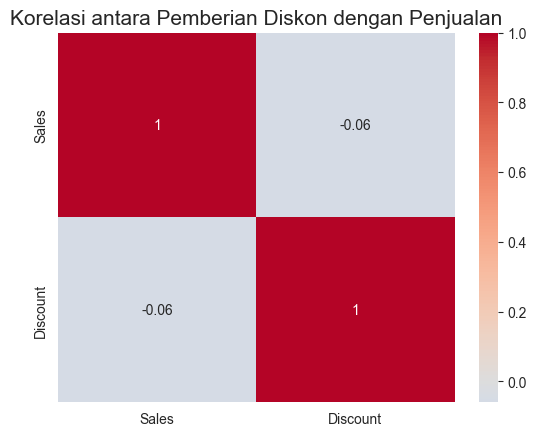

In [73]:
sns.heatmap(sales_discount_df, annot = True, cmap = "coolwarm", center = 0)
plt.title("Korelasi antara Pemberian Diskon dengan Penjualan", fontsize = 15)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa korelasi antara pemberian diskon dengan penjualan sangat rendah.

### Pertanyaan 7: Identifikasi independensi antara 5 negara dengan tingkat penjualan tertinggi dan 3 industri dengan profit tertinggi untuk menentukan apakah 3 industri tersebut harus diprioritaskan atau tidak di 5 negara tersebut. 

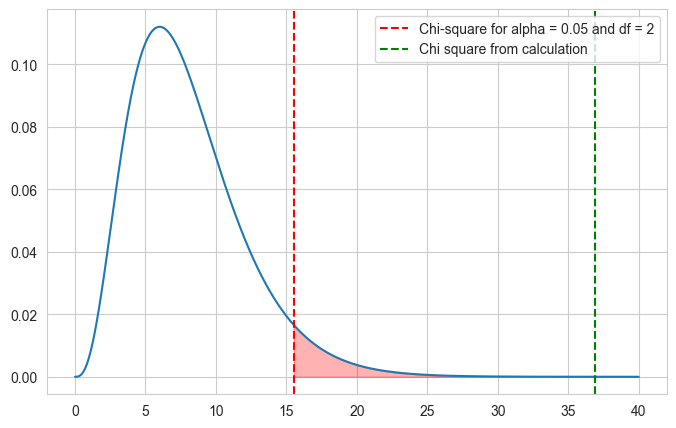

In [74]:
stat, pvalue, dof, expected_freq = chi2_contingency(country_industry_df)

x = np.arange(0, 40, 0.001)
fig, ax = plt.subplots(figsize = (8, 5))
plt.plot(x, stats.chi2.pdf(x, df = dof))
line_x, line_y = ax.lines[0].get_data()

rejection = stats.chi2.ppf(1 - alpha, dof)

ax.axvline(
    x = rejection,
    color = "red",
    linestyle = "--",
    label = "Chi-square for alpha = 0.05 and df = 2"
)

ax.fill_between(
    line_x,
    line_y,
    where = (line_x > rejection),
    color = "red",
    alpha = 0.3
)

ax.axvline(
    x = stat,
    color = "green",
    linestyle = "--",
    label = "Chi square from calculation"
)

plt.legend()
plt.show()

Dari visualisasi tersebut dapat dilihat bahwa untuk significance level di angka 0.05 dan degree of freedom sebesar 2, nilai $\chi^2$-nya adalah sebesar 15.51. Kita akan menolak `H0` apabila nilai $\chi^2$ dari perhitungan di atas 15.51. Dari visualisasi tersebut, dapat dilihat bahwa nilai $\chi^2$ dari perhitungan yaitu 36.91 dan berada di sebelah kanan dari area penolakan. Dengan demikian, kita dapat menolak `H0`.

## Rekomendasi

- Rekomendasi Pertanyaan 1: Perusahaan dapat mengalokasikan sumber daya untuk melakukan penelitian dan pengembangan lebih lanjut secara strategis. Karena SaaS Connector Pack - Gold, Alchemy, Storage, Support, dan Data Smasher merupakan produk-produk unggulan dengan profit margin tertinggi, maka perusahaan disarankan untuk mengalokasikan lebih banyak sumber daya serta berfokus pada peningkatan dan penyempurnaan produk-produk tersebut. Perusahaan dapat melakukan investasi untuk meneliti dan mengembangkan produk-produk tersebut dengan menambahkan fitur-fitur baru, meningkatkan pengalaman pengguna, dan menyelesaikan permasalahan yang dilaporkan pelanggan. Investasi ini berpotensi meningkatkan profitabilitas dan kepuasan pelanggan. Selain itu, perusahaan juga dapat menganalisis faktor-faktor yang membuat produk-produk ini sukses dan menerapkannya pada produk-produk lain sehingga juga dapat mengoptimalkan profit margin produk-produk lainnya.

- Rekomendasi Pertanyaan 2: Perusahaan disarankan untuk melakukan evaluasi mendalam terhadap struktur biaya dan harga jual dari produk-produk tersebut. Perusahaan dapat mempertimbangkan untuk menyesuaikan harga agar lebih mencerminkan nilai pasar dan biaya produksi, sambil tetap mempertahankan daya saing. Selain itu, analisis lebih lanjut terkait permintaan pasar dan preferensi pelanggan dapat membantu mengidentifikasi peluang untuk menambah nilai atau merancang ulang produk guna meningkatkan profitabilitas.

- Rekomendasi Pertanyaan 3: Perusahaan dapat menyesuaikan penawaran produk dan strategi pemasaran secara khusus untuk menarget industri Finance, Energy, dan Manufacturing yang merupakan industri dengan tingkat profitabilitas tertinggi. Perusahaan juga dapat mempertimbangkan untuk mengembangkan solusi khusus yang dapat memenuhi kebutuhan dan tantangan unik di masing-masing industri, sehingga akan membantu memperkuat kehadiran perusahaan dan menarik lebih banyak pelanggan di inddustri-industri dengan profit tinggi ini.

- Rekomendasi Pertanyaan 4: Perusahaan dapat memperluas tim penjualan dan pemasaran di Amerika Serikat, Inggris, Jepang, Kanada, dan Perancis yang merupakan negara-negara dengan tingkat penjualan tertinggi. Untuk memperkuat tim di negara-negara ini, perusahaan juga dapat membentuk tim dukungan lokal di masing-masing negara tersebut. Dengan membangun kemitraan dengan bisnis lokal dan menghadiri acara industri juga dapat membantu memperkuat penetrasi pasar dan memaksimalkan potensi penjualan yang signifikan di negara-negara ini.

- Rekomendasi Pertanyaan 5: Untuk meningkatkan retensi di segmen pelanggan Usaha Kecil Menengah (UKM) yang memberikan profit tertinggi, perusahaan sebaiknya berfokus pada pengembangan program loyalitas yang dirancang khusus untuk memenuhi kebutuhan mereka. Perusahaan dapat menawarkan insentif berupa diskon eksklusif, layanan dukungan prioritas, atau akses ke fitur tambahan yang dapat membantu bisnis mereka berkembang. Selain itu, perusahaan dapat melakukan komunikasi yang proaktif dan personal dengan pelanggan di segmen ini untuk memahami kebutuhan mereka secara lebih mendalam, serta berikan solusi yang relevan dan tepat waktu untuk meningkatkan kepuasan dan kesetiaan mereka terhadap produk dan layanan perusahaan.

- Rekomendasi Pertanyaan 6: Perusahaan harus menganalisis kembali efektivitas strategi diskon. Dengan mengacu pada hasil korelasi negatif yang sangat lemah antara pemberian diskon dan tingkat penjualan, maka sangat penting untuk mengevaluasi strategi pemberian diskon dengan cermat. Perusahaan harus melakukan pengujian lebih lanjut untuk menilai dampak dari berbagai tingkat diskon terhadap tingkat penjualan. Perusahaan dapat memantau perilaku pelanggan dan pola pembelian secara cermat selama periode diskon. Sesuaikan strategi diskon berdasarkan wawasan yang diperoleh untuk mencapai keseimbangan optimal antara peningkatan penjualan dan peningkatan profit margin.

- Rekomendasi Pertanyaan 7: Perusahaan dapat menerapkan strategi referensi silang antara negara dan industri. Berdasarkan hasil analisis, terdapat keterkaitan antara negara dengan penjualan tertinggi dan industri dengan profit tertinggi, sehingga disarankan untuk memprioritaskan penyelarasan penawaran produk dengan kebutuhan industri di masing-masing negara tersebut. Perusahaan dapat menyesuaikan pesan pemasaran untuk menekankan bagaimana produk dapat secara khusus memberikan manfaat bagi industri yang ditargetkan di setiap negara. Pendekatan ini kemungkinan besar akan meningkatkan keterlibatan pelanggan dan memperkuat tingkat konversi.